<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week4/Python_data_visualization_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Types of graphs


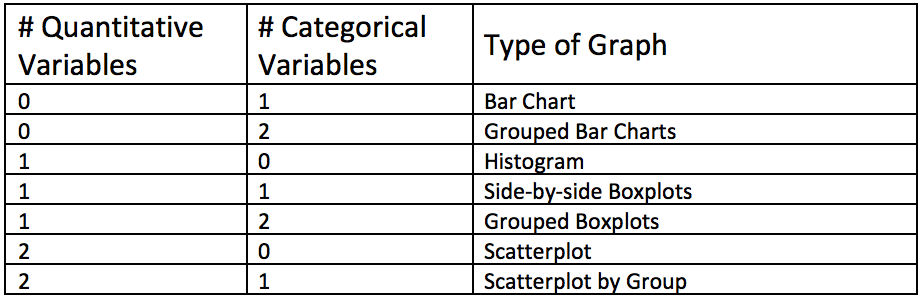

## With categorical data

*   Bar chart (great for counts)
*   Boxplot


## With quantitative data

* Line plot  
* Histogram
*   Scatterplot (with regression line)


Load the data and prepare the datasets

In [ ]:
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/numpy/Week2_homework_data.csv?raw=true')

In [ ]:
df.head()

In [ ]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/numpy/Week2_homework_dictionary.csv')
dictionary.head()

In [ ]:
# rename the dataframe columns

# dictionary comprehenesion converts a tuple in a dictionary
# dict((key, func(key)) for key in keys)
dictionary_columns = dict( (dictionary.loc[i, 'Code'], dictionary.loc[i, 'Description']) for i in dictionary.index)

# or using zip (makes tuples out of equally sized series/arrays)
dictionary_columns = dict(zip(dictionary['Code'], dictionary['Description']))

df = df.rename(columns = dictionary_columns)

df.head()

In [ ]:
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
sales_data = pd.read_csv('company_sales_data.csv')

In [ ]:
sales_data

In [ ]:
SNPs = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/pandas/CD93_exomeSNPs_annotation.csv")
SNPs.head()

In [ ]:
# import useful datasets
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipotle.head()

In [ ]:
tips = sns.load_dataset("tips")
tips

# Categorical plots

## Barplot

In [ ]:
# How many of each type of Variant consequence?
counts = SNPs['Variant consequence'].value_counts()
plt.bar(counts.index, counts.values)

In [ ]:
# How many of each type of Variant consequence?
counts = SNPs['Variant consequence'].value_counts()
plt.barh(counts.index, counts.values)

In [ ]:
#plot the cumulative quantity per item in chipotle
item_quantity= chipotle.groupby('item_name')['quantity'].sum()
plt.figure(figsize = (10, 12))
plt.barh(item_quantity.index, item_quantity.values)

### Exercise 1

Plot the total revenue of the chipotle items (like above, but considering item_price (remember that the dollars have to be converted into numbers!).

### Exercise 2

Plot how many males and females are in the df dataset.

## Boxplot

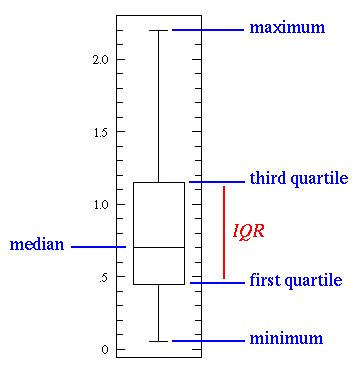

In [ ]:

sns.boxplot(x = "Gender", y = 'Height [cm]', data = df)

In [ ]:
plt.figure(figsize = (8,8)) # change plot size
sns.boxplot(x = "Gender", y = 'Height [cm]', data = df)

plt.title('Height in a population')

In [ ]:


plt.figure(figsize = (8,8))
sns.boxplot(x = "Gender", y = 'Height [cm]', data = df, showfliers=False) #remove outliers

plt.title('Height in a population')

In [ ]:
plt.figure(figsize = (8,8))

data = [df[df['Gender'] == 0]['Height [cm]'], df[df['Gender'] == 1]['Height [cm]']] #give a series of data to plot
plt.boxplot(data, showfliers=False, labels = ['females', 'males']) #and assign labels
plt.ylabel('Height  [cm]')
plt.title('Height in a population')

### Exercise 3

Plot the average waist circumference and hip circumference measurement of males and females (two plots). 

### Exercise 4

Plot two boxplots describing PolyPhen and SIFT scores of Variant consequences of the SNPs dataset.

# Quantitative plots

## Line plot

In [ ]:
sales_data

In [ ]:
plt.plot(sales_data['month_number'], sales_data['facecream'])

In [ ]:
plt.figure(figsize=(12,8)) #change size of graph
plt.plot(sales_data['month_number'], sales_data['facecream'])

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'])
plt.ylabel("revenue [$]") # add label
plt.xlabel("month") # add label


In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'])
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.ylim(0,) # restrict the limit

### Exercise 5

Plot the moisturizer sales, showing only data from May until September.

HINT: use xlim()

## Histograms

In [ ]:
plt.hist(x = df['Waist circumference [cm]'])


In [ ]:
# a bit better looking
plt.figure(figsize = (8,8))
plt.hist(x = df['Waist circumference [cm]'], bins=100) # change the number of bins

plt.xlabel('Waist circumference [cm]')
plt.ylabel('Individuals [counts]')
plt.title('Waist circumference in a population')

### Exercise 7

Plot the distribution of tips between male and female servers

### Exercise 8


Plot the distribution of tips in the tips dataset for each day of the week.

## Scatterplot

In [ ]:
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'])

In [ ]:
# change the size of the markers
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1) # s changes the size


In [ ]:
# add x and y labels
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')

In [ ]:
# add plot title
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')
plt.title('Waist and hip circumference in a population')

In [ ]:
# change the size of the plot
plt.figure(figsize = (8,8))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')
plt.title('Waist and hip circumference in a population')

### Exercise 9

Plot total bill vs tip amount in every day of the week (tips dataset).


## Lm plot

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips)

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
               data=tips, col_wrap=2, height=3)

# Change the estethics of the plot

#### Download fonts

In [ ]:
!cd /usr/share/fonts/truetype/
!wget https://www.freefontspro.com/d/14454/arial.zip
!unzip arial.zip
!rm arial.zip
!ls

In [ ]:
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/arial.ttf'
fontprop = fm.FontProperties(fname=path) # this is how you call Arial (or whatever font you choose)

In [ ]:
!wget https://www.freefontspro.com/d/11320/cac-lasko-even-weight.zip
!unzip cac-lasko-even-weight.zip
!rm cac-lasko-even-weight.zip
!ls

In [ ]:
path = '/usr/share/fonts/truetype/caclaskoevenweight.ttf'
fontprop2 = fm.FontProperties(fname=path) # this is how you call Arial (or whatever font you choose)

In [ ]:
!wget https://www.wfonts.com/download/data/2014/06/05/comic-sans-ms/comic-sans-ms.zip
!unzip comic-sans-ms.zip
! rm comic-sans-ms.zip
! ls

In [ ]:
path = '/usr/share/fonts/truetype/COMIC.TTF'
fontprop3 = fm.FontProperties(fname=path) # this is how you call Arial (or whatever font you choose)

In [ ]:
# change font/color of labels/titles
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)

### Change properties of graph


In [ ]:
# change the properties of x and y ticks
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )  # x ticks properties
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 ) # y ticks properties

In [ ]:
# change the color of markers
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1, c='k') # c changes the colors
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

In [ ]:
# change the marker
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=30, c='k', marker='+')  # change the marker
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

### Multiple plots in one

In [ ]:
plt.figure(figsize = (15,15))
# plot for females
df1 = df[df['Gender'] == 0]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

# plot for males
df1 = df[df['Gender'] == 1]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

In [ ]:
plt.figure(figsize = (15,15))
# plot for females
df1 = df[df['Gender'] == 0]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, label = 'Females') # add label

# plot for males
df1 = df[df['Gender'] == 1]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, label = 'Males')  # add label

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) # add legend

In [ ]:
plt.figure(figsize = (15,15))

# run a loop to plot multiple scatters

for gender in range(0,2):
  print(gender)
  df1 = df[df['Gender'] == gender]
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

In [ ]:
# make a dictionary to specify properties of each population

#nested dictionary
gender_dictionary = { 0: {"color":'purple', 'label': 'Females'},
                     1 : {"color":'turquoise', 'label': 'Males'}}

plt.figure(figsize = (15,15))

for gender in gender_dictionary:
  df1 = df[df['Gender'] == gender]
  
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, 
              c=gender_dictionary[gender]['color'], label = gender_dictionary[gender]['label'])

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) 

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'], label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k',  linestyle='--', linewidth=3)
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.legend()
plt.ylim(0,) # restrict the limit

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'], label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k',  linestyle='--', linewidth=3)
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.legend(loc='lower left') #change the location of the label
plt.ylim(0,) 

# Save the figure

In [ ]:
# save the figure
gender_dictionary = { 0: {"color":'purple', 'label': 'Females'},
                     1 : {"color":'turquoise', 'label': 'Males'}}

plt.figure(figsize = (15,15))

for gender in gender_dictionary:
  df1 = df[df['Gender'] == gender]
  
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, 
              c=gender_dictionary[gender]['color'], label = gender_dictionary[gender]['label'])

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) 
plt.savefig('some_ugly_figure.png', dpi = 300)
plt.savefig('some_ugly_figure.svg', dpi = 300)
plt.savefig('some_ugly_figure.pdf', dpi = 300)
plt.savefig('some_ugly_figure.eps', dpi = 300)

In [ ]:
data

# Appendix

## Colors

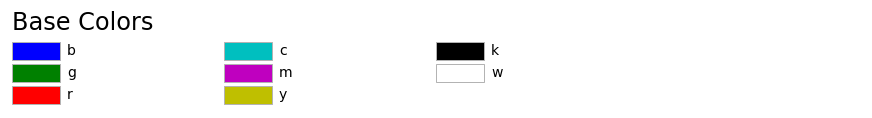

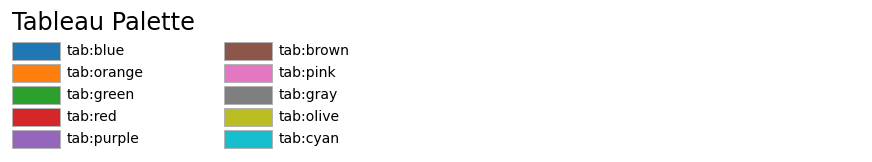


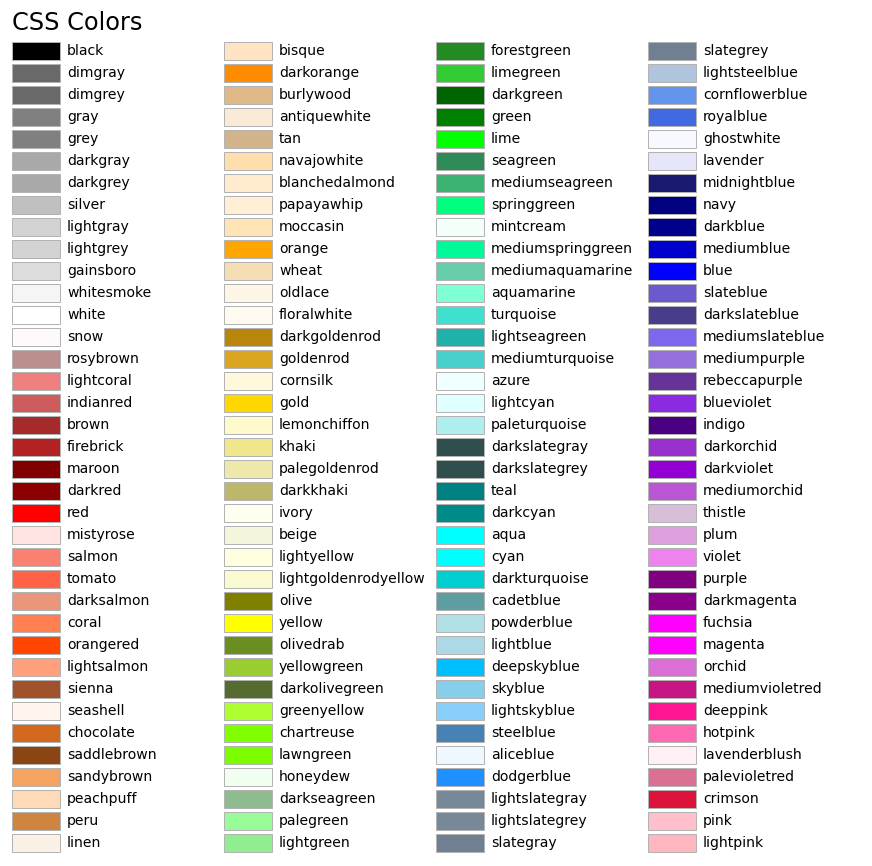

## Markers

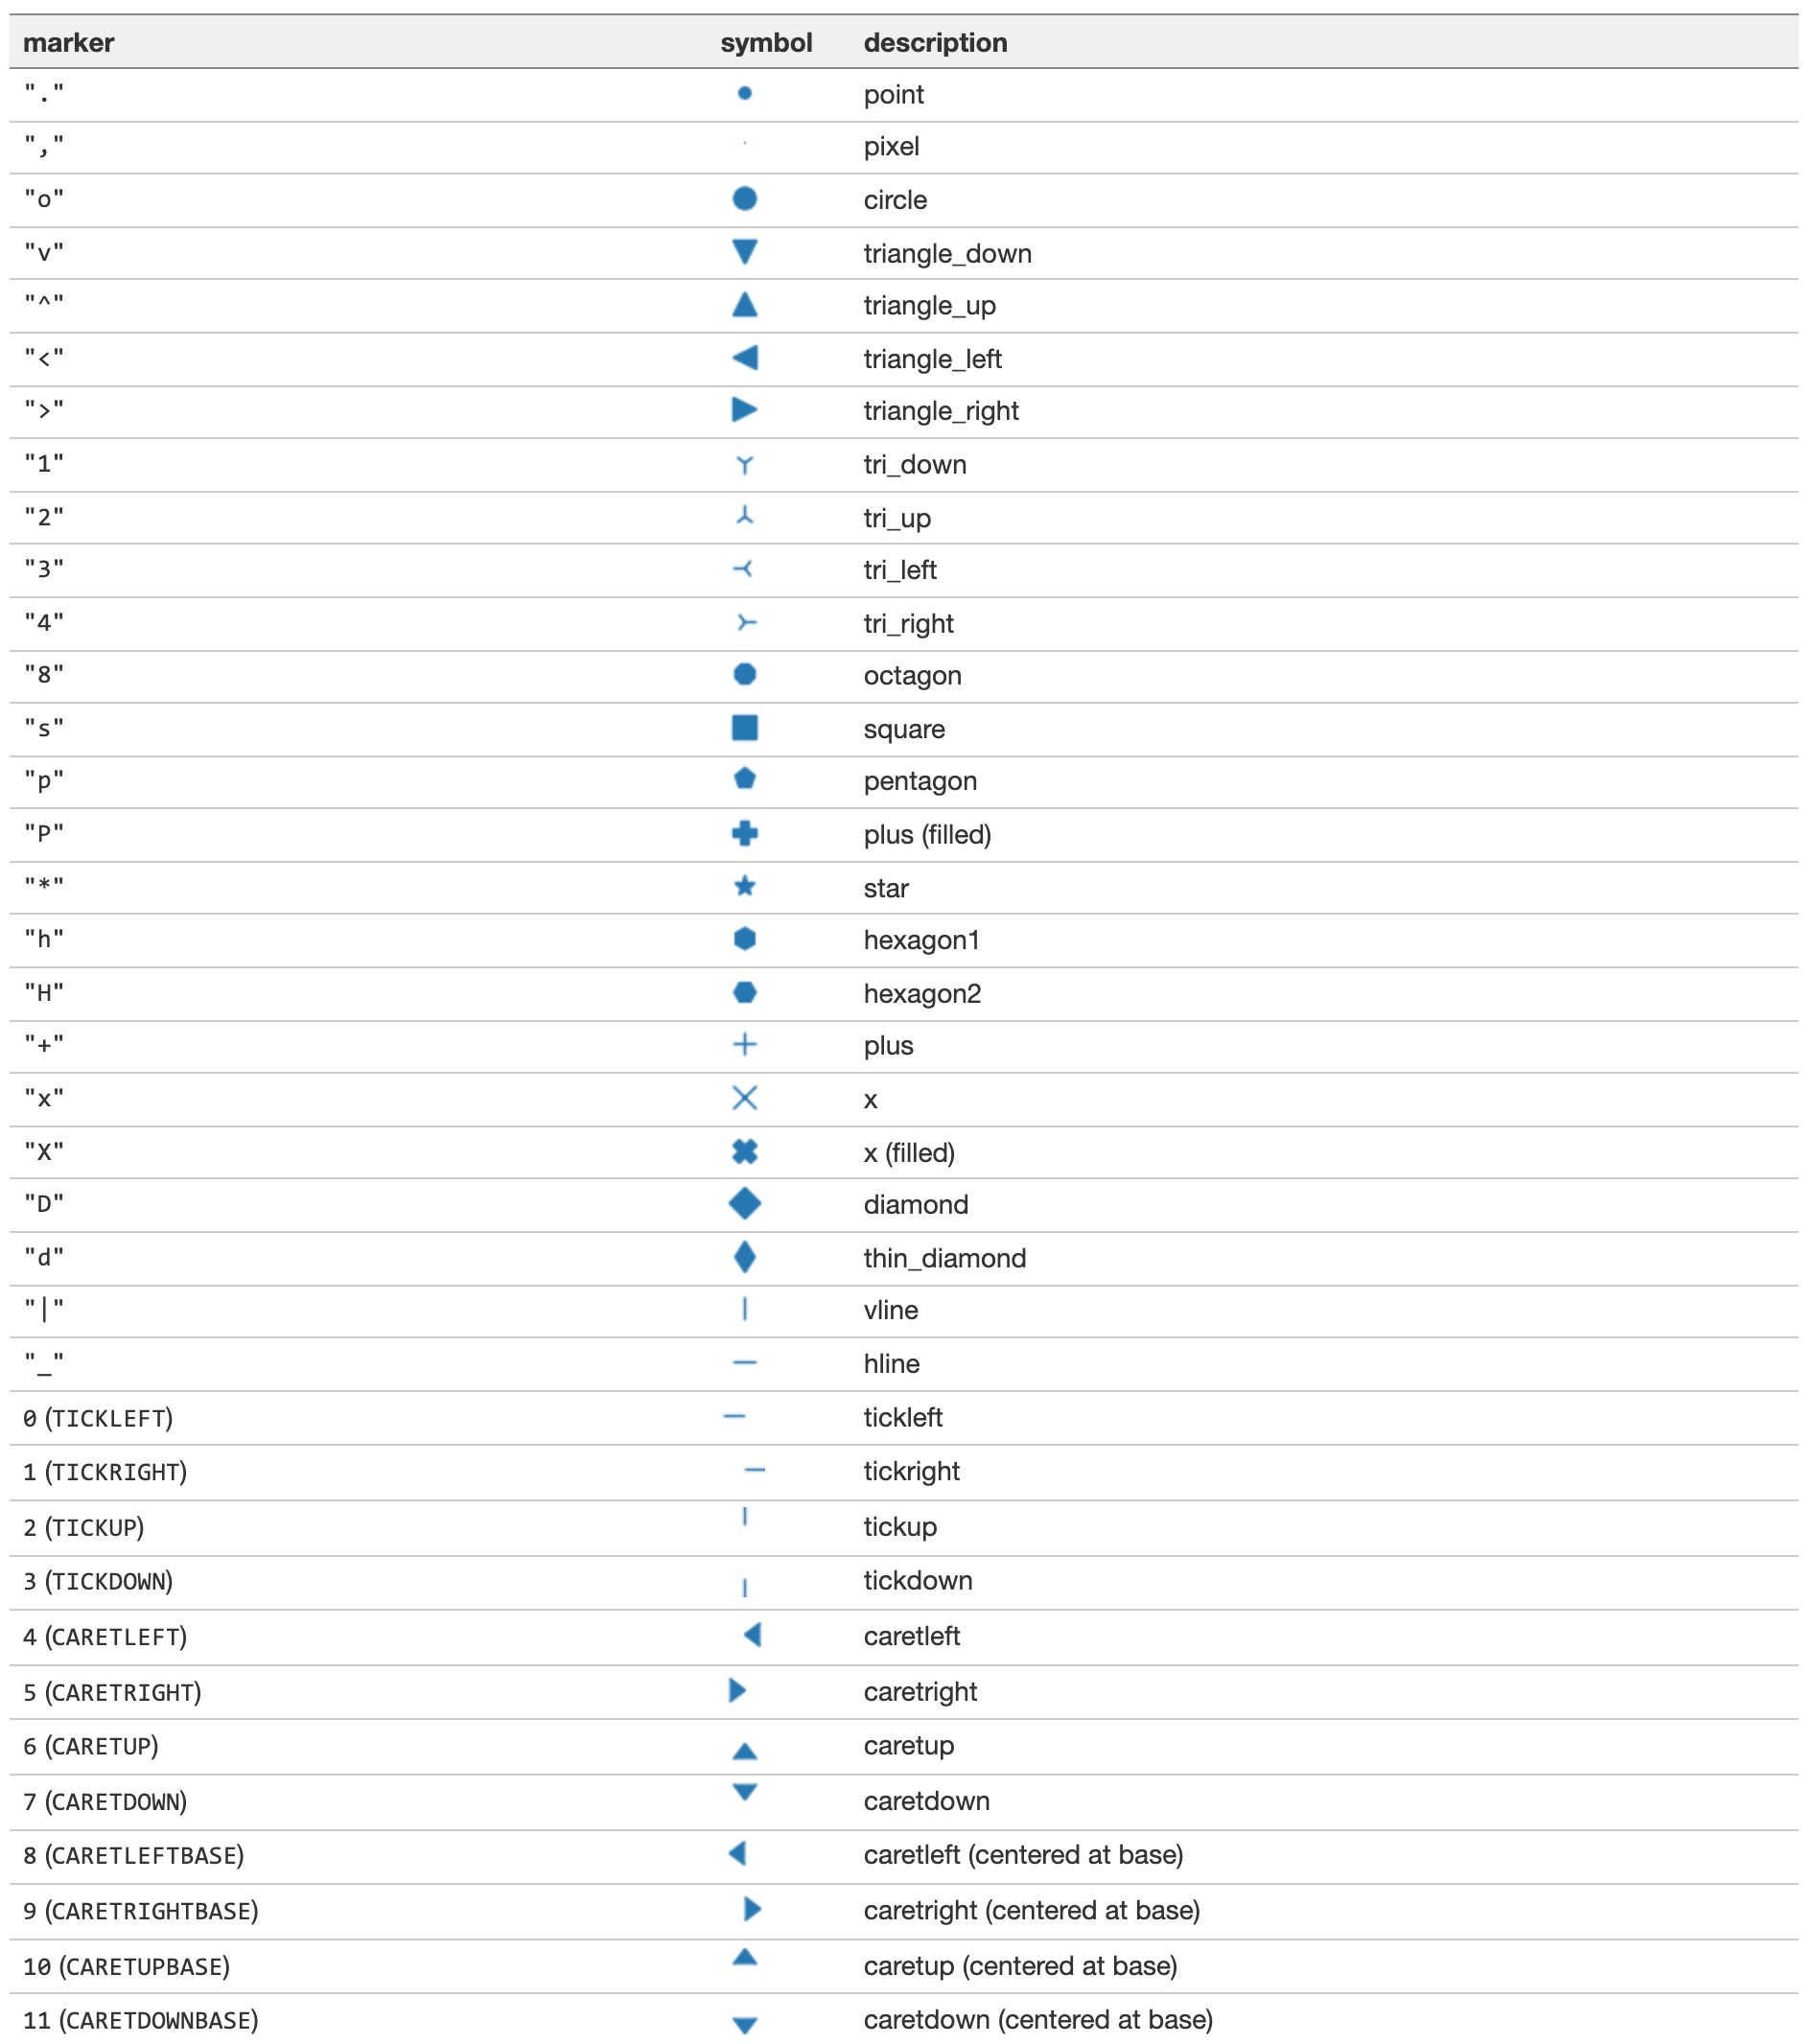

In [ ]:
#